# Ejemplo de diagrama de Nyquist

Vamos a utilizar las librerias Sympy para calculo simbólico. 

In [1]:
import sympy as sp
from sympy import symbols, Eq, I
from sympy.plotting import plot_implicit
from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot
from sympy.physics.control.control_plots import bode_plot

Definimos las variables de la función de transferencia. En este caso a $S$, como la variable compleja 

In [2]:
S = sp.symbols('S')

Luego definimos la función de transferencia $A$

In [3]:
A = 1/(S**3+2*S**2+S+3)
A

1/(S**3 + 2*S**2 + S + 3)

Mediante el uso de la función simplify se puede simplificar la expresión:

In [4]:
H = sp.simplify(A)
H

1/(S**3 + 2*S**2 + S + 3)

Para poder operar utilizar esta expresión como una función de transferencia de un sistema LTI, en neceserio emplear la función $TransferFunction$. Esta función toma como argumento los polinomios del númerador y denominador de la función que queremos representar.

Para obtener esos polinomios podemos hacer uso de la función que nos devuelve el numerador y denominador de las nuestra ecuación $A$:

In [5]:
H.as_numer_denom()

(1, S**3 + 2*S**2 + S + 3)

In [6]:
TF= TransferFunction(H.as_numer_denom()[0], H.as_numer_denom()[1], S)
TF

TransferFunction(1, S**3 + 2*S**2 + S + 3, S)

### Gráfica de polos y ceros de la función de transferencia

Mediante la función $pole_zero_plot$ podemos graficar la ubicación de los polos y ceros del función de transfencia en el plano complejo:

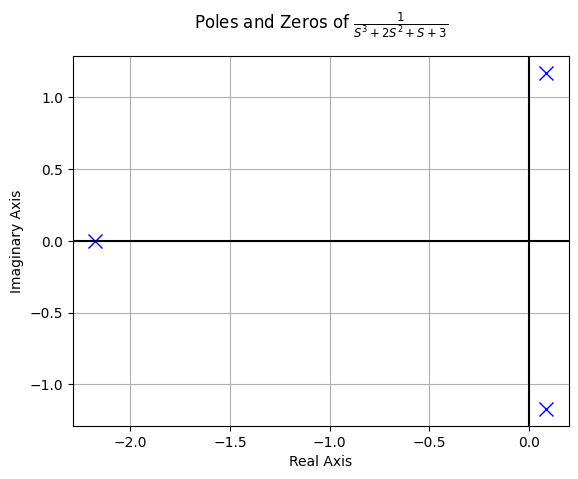

In [7]:
pole_zero_plot(TF)

### Gráfica del diagrama de Bode de la función de transferencia

Mediante la función $bode_plot$ podemos obtener las gráficas de Bode de la función de transferencia:

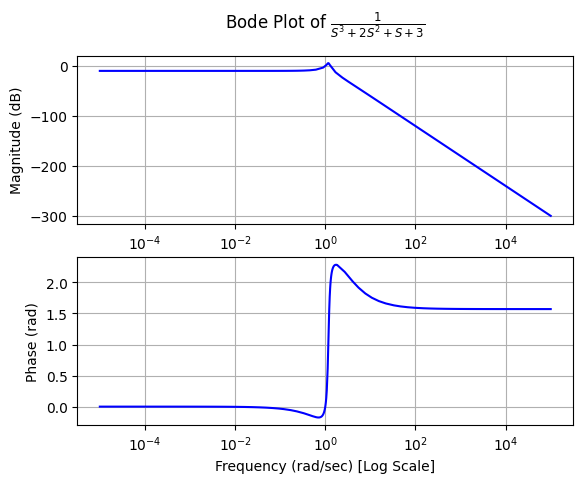

In [8]:
bode_plot(TF)

## Gráfica del diagrama polar de la función de tranferencia

Para este caso vamos a utilizar la librería scipy 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [10]:
numerador = TF.num
numerador

1

In [11]:
#coeficientesNume=sp.Poly(numerador).all_coeffs()
numerador = 1

In [12]:
denominador = TF.den
denominador

S**3 + 2*S**2 + S + 3

In [13]:
coeficientesDen=sp.Poly(denominador).all_coeffs()
coeficientesDen

[1, 2, 1, 3]

In [14]:
denominador = [float(x) for x in coeficientesDen]
#numerador = [float(x) for x in coeficientesNume]

In [15]:
sys =signal.TransferFunction(numerador, denominador)

In [16]:
w, h = signal.freqresp(sys)

### Graficar en el plano complejo

In [17]:
fig, ax = plt.subplots()
ax.plot(h.real, h.imag)
ax.plot(h.real, -h.imag)

ax.set_xlabel('Parte real')
ax.set_ylabel('Parte imaginaria')
ax.grid(True)

plt.show()

## Diagrama de nyquist con la librería control.py

In [18]:
import control as ct

Se define la función de transferencia con los arreglos de los coeficientes del polinomio del númerador y denominador. 

In [19]:
numerador, denominador

(1, [1.0, 2.0, 1.0, 3.0])

In [20]:
tf = ct.tf(numerador,denominador)
tf

TransferFunction(array([1]), array([1., 2., 1., 3.]))

La librería control viene con una función para graficar en el plano complejo los polos y ceros de la función de transferencia.

In [21]:
ct.pzmap(tf)

array([[list([<matplotlib.lines.Line2D object at 0x7f7f37f29210>]),
        list([])]], dtype=object)

La librería también permite graficar el diagrama de Bode de la función

In [22]:
%matplotlib inline
#fig = plt.figure()
ct.bode_plot(tf,dB=True, Hz=False)

array([[list([<matplotlib.lines.Line2D object at 0x7f7f37f386d0>])],
       [list([<matplotlib.lines.Line2D object at 0x7f7f37f99950>])]],
      dtype=object)

La librería también permite graficar el diagrama de Nysquit de la función

array([list([<matplotlib.lines.Line2D object at 0x7f7f37e92b90>, None, <matplotlib.lines.Line2D object at 0x7f7f37ea5dd0>, None])],
      dtype=object)

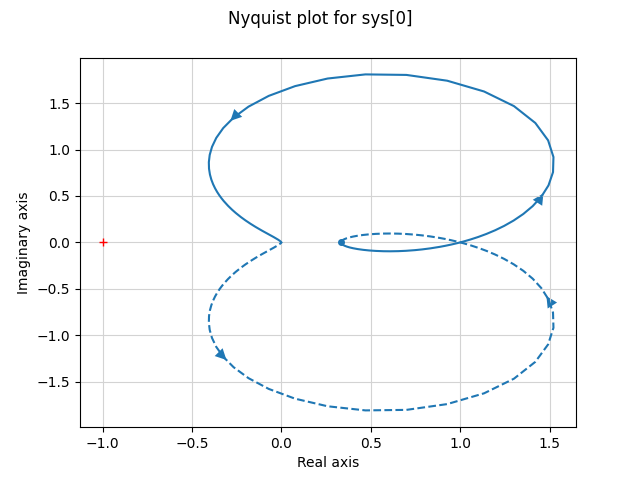

In [23]:
#%matplotlib widget
%matplotlib ipympl
fig = plt.figure()
w = np.logspace(-3,3,1000)
#ct.nyquist(tf,w,label_freq=10)
ct.nyquist(tf)